### Bootcamp Analytics 2025 | Ejercicio limpieza y EDA

#### 0. Carga de librerias

In [43]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
file_path = r"C:\Users\decas\OneDrive\Documentos\Daniel\10. Bootcamp Analytics\Sesión 8\Tarjetas_de_cr_dito_y_d_bito_20250317.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas
df.head()

,TIPOENTIDAD,CODIGOENTIDAD,NOMBREENTIDAD,FECHACORTE,COD_UCA,NOMBRE_UCA,SUBCUENTA,DESCRIPCION,PERSONA_NATURAL,PERSONA_JURIDICA,TOTAL_TARJETAS
0,1,1,BANCO DE BOGOTA S. A.,31/03/2023,1,CREDIBANCO-VISA,5,Número total de tarjetas de crédito vigentes ...,1123383.0,39790.0,1163173.0
1,1,1,BANCO DE BOGOTA S. A.,31/03/2023,1,CREDIBANCO-VISA,10,Número total de tarjetas de crédito vigentes d...,46459.0,540.0,46999.0
2,1,1,BANCO DE BOGOTA S. A.,31/03/2023,1,CREDIBANCO-VISA,15,Número total de tarjetas de crédito canceladas,27276.0,562.0,27838.0
3,1,1,BANCO DE BOGOTA S. A.,31/03/2023,1,CREDIBANCO-VISA,20,Número total de tarjetas de créditos bloqueada...,262748.0,4292.0,267040.0
4,1,1,BANCO DE BOGOTA S. A.,31/03/2023,1,CREDIBANCO-VISA,25,Número de transacciones por compras a nivel na...,2146179.0,196711.0,2342890.0


In [44]:
# Dimensiones del DataFrame (filas, columnas)
print("Dimensiones del DataFrame:", df.shape)

Dimensiones del DataFrame: (159470, 11)


In [46]:
# Información general sobre cada columna (tipos, cantidad de nulos, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159470 entries, 0 to 159469
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TIPOENTIDAD       159470 non-null  int64         
 1   CODIGOENTIDAD     159470 non-null  int64         
 2   NOMBREENTIDAD     159470 non-null  object        
 3   FECHACORTE        159470 non-null  datetime64[ns]
 4   COD_UCA           159470 non-null  int64         
 5   NOMBRE_UCA        159470 non-null  object        
 6   SUBCUENTA         159470 non-null  int64         
 7   DESCRIPCION       159470 non-null  object        
 8   PERSONA_NATURAL   159470 non-null  float64       
 9   PERSONA_JURIDICA  159470 non-null  float64       
 10  TOTAL_TARJETAS    159470 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 13.4+ MB


In [45]:
# Recuento estadístico de las columnas numéricas
df.describe()

,TIPOENTIDAD,CODIGOENTIDAD,FECHACORTE,COD_UCA,SUBCUENTA,PERSONA_NATURAL,PERSONA_JURIDICA,TOTAL_TARJETAS
count,159470.000000,159470.000000,159470,159470.000000,159470.000000,1.594700e+05,1.594700e+05,1.594700e+05
mean,8.999392,30.100069,2020-02-20 22:58:30.378127360,3.372177,51.324920,6.830961e+10,4.327198e+09,1.137991e+11
min,1.000000,1.000000,2015-01-31 00:00:00,1.000000,5.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,7.000000,2017-08-31 00:00:00,1.000000,25.000000,0.000000e+00,0.000000e+00,2.065000e+04
50%,1.000000,26.000000,2020-02-29 00:00:00,2.000000,50.000000,1.202300e+04,0.000000e+00,1.599389e+07
75%,1.000000,49.000000,2022-08-31 00:00:00,6.000000,75.000000,4.546482e+08,5.633500e+03,3.333120e+09
max,118.000000,128.000000,2025-01-31 00:00:00,8.000000,130.000000,8.978556e+12,1.316396e+12,2.002509e+13
std,27.077815,25.820446,NaN,2.225872,31.653289,4.017549e+11,3.630515e+10,6.243967e+11


In [48]:
# Verificar valores nulos en cada columna
print("Conteo de valores nulos:")
print(df.isnull().sum())

Conteo de valores nulos:
TIPOENTIDAD         0
CODIGOENTIDAD       0
NOMBREENTIDAD       0
FECHACORTE          0
COD_UCA             0
NOMBRE_UCA          0
SUBCUENTA           0
DESCRIPCION         0
PERSONA_NATURAL     0
PERSONA_JURIDICA    0
TOTAL_TARJETAS      0
dtype: int64


In [ ]:
## Verificar valores duplicados
duplicados = df.duplicated()
print("Número de filas duplicadas:", duplicados.sum())

Número de filas duplicadas: 0


In [50]:
# En caso de querer eliminarlas
df.drop_duplicates(inplace=True)

### Limpieza de datos

In [51]:
# Conversion de formato de fecha 
df['FECHACORTE'] = pd.to_datetime(df['FECHACORTE'], format='%d/%m/%Y')

In [52]:
## Revisión transformación
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159470 entries, 0 to 159469
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TIPOENTIDAD       159470 non-null  int64         
 1   CODIGOENTIDAD     159470 non-null  int64         
 2   NOMBREENTIDAD     159470 non-null  object        
 3   FECHACORTE        159470 non-null  datetime64[ns]
 4   COD_UCA           159470 non-null  int64         
 5   NOMBRE_UCA        159470 non-null  object        
 6   SUBCUENTA         159470 non-null  int64         
 7   DESCRIPCION       159470 non-null  object        
 8   PERSONA_NATURAL   159470 non-null  float64       
 9   PERSONA_JURIDICA  159470 non-null  float64       
 10  TOTAL_TARJETAS    159470 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 13.4+ MB


In [53]:
### Eliminación de espacios en blanco
df['NOMBREENTIDAD'] = df['NOMBREENTIDAD'].str.strip()
df['NOMBRE_UCA'] = df['NOMBRE_UCA'].str.strip()
df['DESCRIPCION'] = df['DESCRIPCION'].str.strip()


In [54]:
### Revisión de valores únicos de variables categóricas

df['NOMBREENTIDAD'].value_counts()

NOMBREENTIDAD
BANCO DAVIVIENDA S.A.                                                               11664
SCOTIABANK COLPATRIA S.A.                                                           10125
BANCOLOMBIA S.A.                                                                     9591
BANCO BILBAO VIZCAYA ARGENTARIA COLOMBIA S.A. BBVA COLOMBIA                          8562
ITAU CORPBANCA COLOMBIA S.A.                                                         7735
BANCO DE BOGOTA S. A.                                                                7536
BANCO CAJA SOCIAL S.A.                                                               7402
BANCO COOMEVA S.A.                                                                   7337
BANCO DE OCCIDENTE S.A.                                                              7164
BANCO COMERCIAL AV VILLAS S.A.                                                       6840
BANCO GNB SUDAMERIS S.A.                                                             6

In [55]:
df['NOMBRE_UCA'].value_counts()

NOMBRE_UCA
CREDIBANCO-VISA                                      46134
TARJETA DEBITO                                       43041
MASTERCARD                                           42518
OTRAS TARJETAS DE CREDITO                            12797
ADMINISTRADORAS DE SISTEMAS DE PAGO DE BAJO VALOR     8834
AMERICAN EXPRESS                                      3799
DINERS                                                2290
CREDIBANCO SOCIA                                        57
Name: count, dtype: int64

In [56]:
df['DESCRIPCION'].value_counts()

DESCRIPCION
Número de  transacciones por avances a nivel nacional con tarjeta de crédito      5784
Saldo de la cartera por tarjeta de crédito                                        5715
Monto de los intereses corrientes por compras y avances con tarjeta de crédito    5698
Monto de los intereses de mora por compras y avances  con tarjeta de crédito      5688
Total cupo de crédito no utilizado por todos los tarjetahabientes                 5623
                                                                                  ... 
Tarifa Interbancaria de Intercambio - TII por Tarjeta Débito Maestro               121
Tarifa Interbancaria de Intercambio - TII por Tarjeta Master Débito                 72
NUMERO TOTAL T. CON CHIP                                                            19
NUME TOTAL TA. TECNOLOGIA                                                           19
GASTOS POR TARIFA INTER.                                                            19
Name: count, Length: 66, dtype:

### Exploración de Datos (EDA)

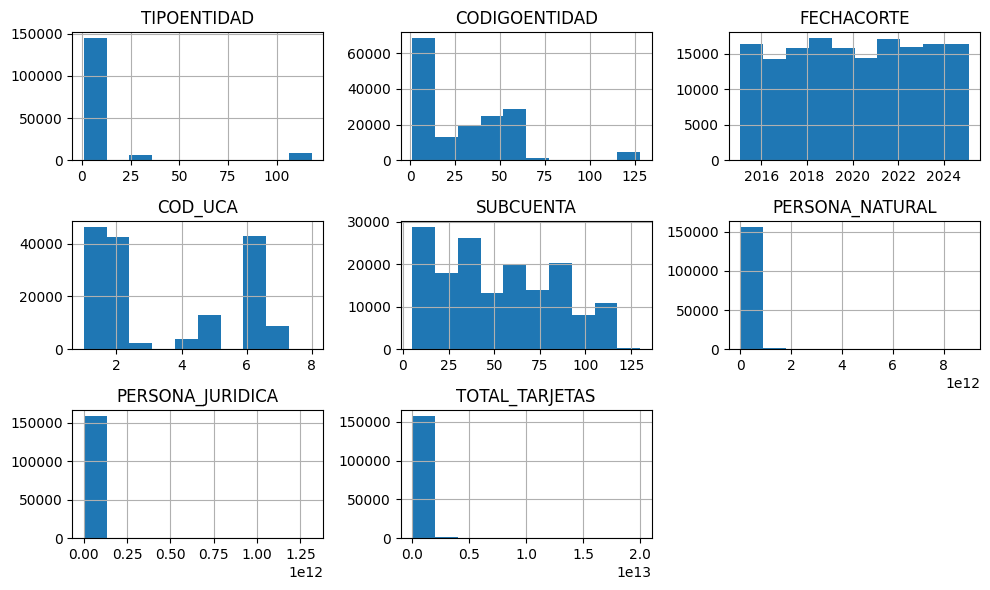

In [ ]:
### Podemos usar el método hist() (histograma) de pandas para ver la distribución de cada columna numérica de forma rápida:

df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


In [63]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,TIPOENTIDAD,CODIGOENTIDAD,COD_UCA,SUBCUENTA,PERSONA_NATURAL,PERSONA_JURIDICA,TOTAL_TARJETAS
TIPOENTIDAD,1.000000,-0.279610,0.418112,0.082005,-0.048396,-0.035158,0.102154
CODIGOENTIDAD,-0.279610,1.000000,-0.045301,-0.093169,-0.013039,-0.067133,-0.061855
COD_UCA,0.418112,-0.045301,1.000000,-0.124751,-0.111978,-0.075294,0.017316
SUBCUENTA,0.082005,-0.093169,-0.124751,1.000000,0.181918,0.118113,0.141304
PERSONA_NATURAL,-0.048396,-0.013039,-0.111978,0.181918,1.000000,0.517608,0.662316
PERSONA_JURIDICA,-0.035158,-0.067133,-0.075294,0.118113,0.517608,1.000000,0.383331
TOTAL_TARJETAS,0.102154,-0.061855,0.017316,0.141304,0.662316,0.383331,1.000000


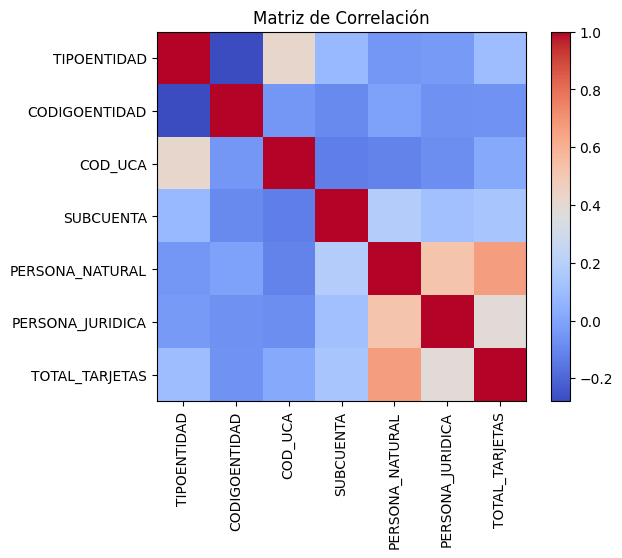

In [64]:
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Matriz de Correlación')
plt.show()

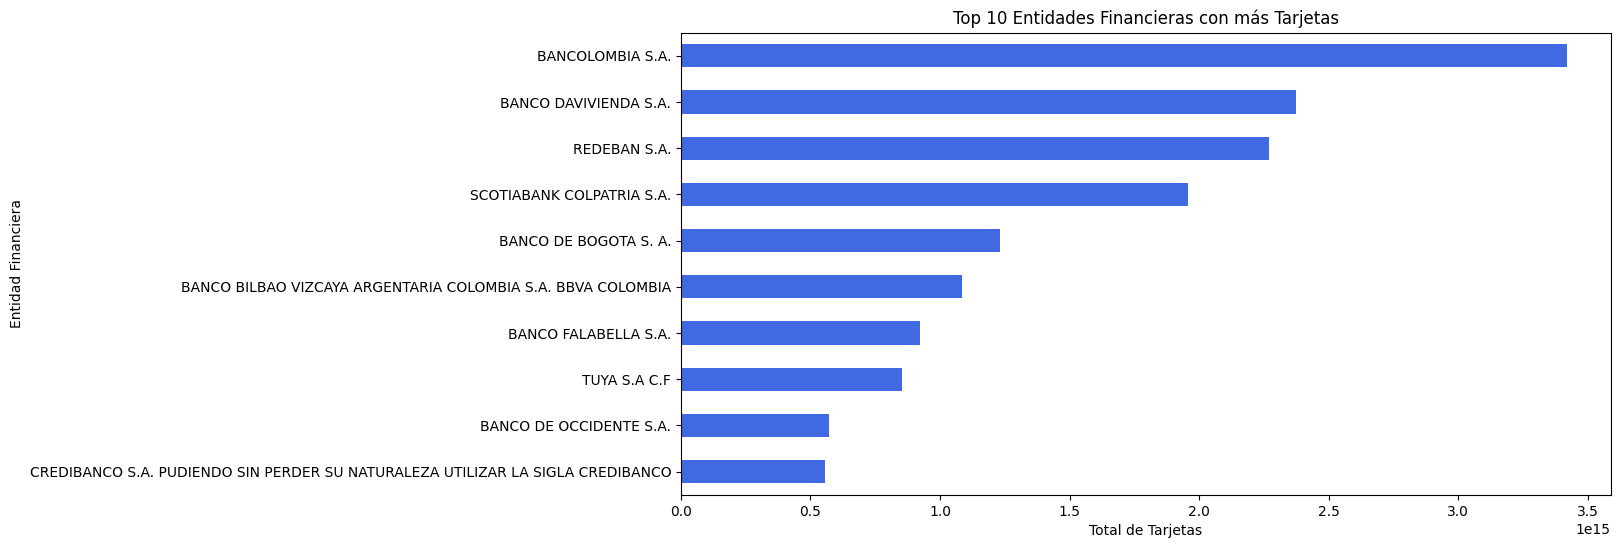

In [39]:
# 1. Distribución de tarjetas por entidad financiera
top_banks = df.groupby("NOMBREENTIDAD")["TOTAL_TARJETAS"].sum().nlargest(10)

plt.figure(figsize=(12,6))
top_banks.sort_values().plot(kind='barh', color='royalblue')
plt.title("Top 10 Entidades Financieras con más Tarjetas")
plt.xlabel("Total de Tarjetas")
plt.ylabel("Entidad Financiera")
plt.show()

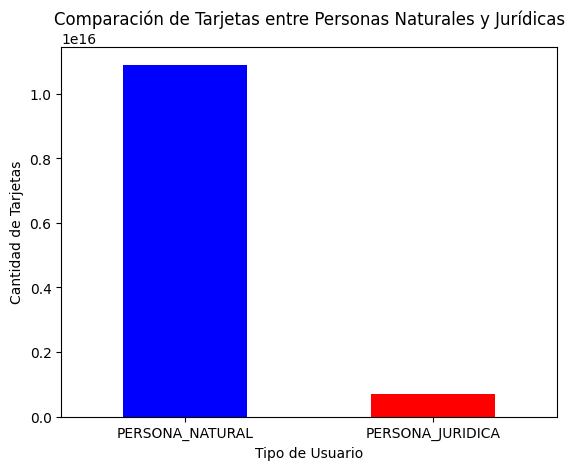

In [40]:
# 2. Comparación entre personas naturales y jurídicas en el uso de tarjetas

df[['PERSONA_NATURAL', 'PERSONA_JURIDICA']].sum().plot(kind='bar', color=['blue', 'red'])
plt.title("Comparación de Tarjetas entre Personas Naturales y Jurídicas")
plt.xlabel("Tipo de Usuario")
plt.ylabel("Cantidad de Tarjetas")
plt.xticks(rotation=0)
plt.show()


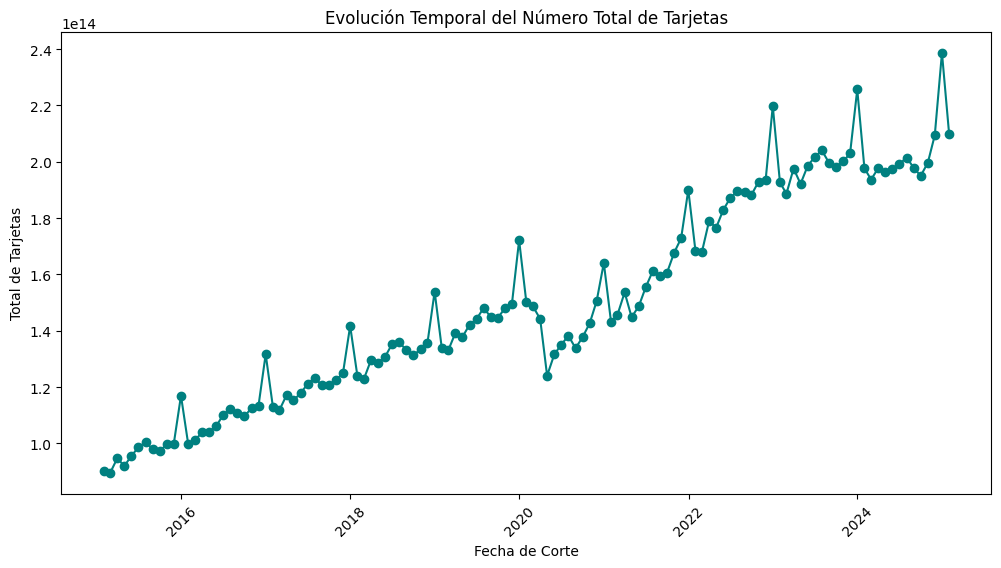

In [ ]:
# 3. Evolucion del número de tarjetas en el tiempo
df_grouped = df.groupby("FECHACORTE")["TOTAL_TARJETAS"].sum()

plt.figure(figsize=(12,6))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='teal')
plt.title("Evolución Temporal del Número Total de Tarjetas")
plt.xlabel("Fecha de Corte")
plt.ylabel("Total de Tarjetas")
plt.xticks(rotation=45)
plt.show()

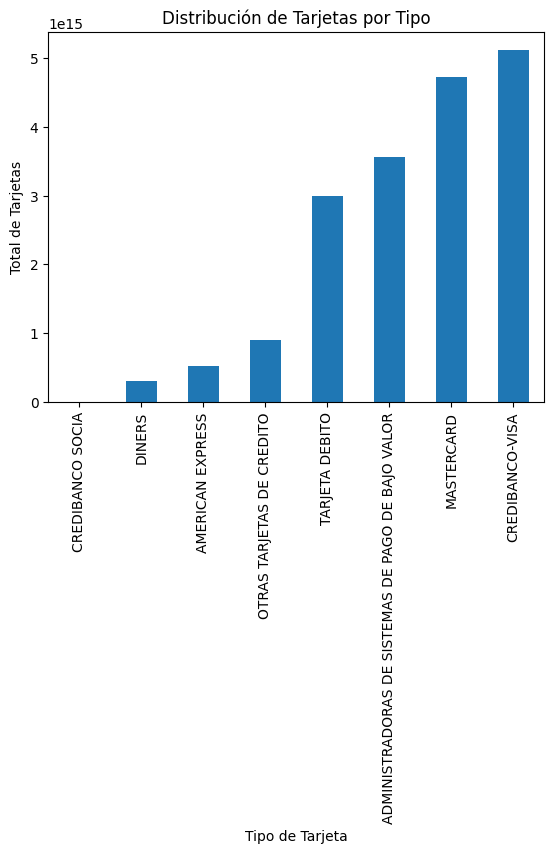

In [ ]:
# 4. Distribución de tarjetas por tipo de tarjeta
tarjetas_por_tipo = df.groupby('NOMBRE_UCA')['TOTAL_TARJETAS'].sum()

# 2. Visualización con gráfico de barras
tarjetas_por_tipo.sort_values().plot(kind='bar')
plt.title('Distribución de Tarjetas por Tipo')
plt.xlabel('Tipo de Tarjeta')
plt.ylabel('Total de Tarjetas')
plt.show()

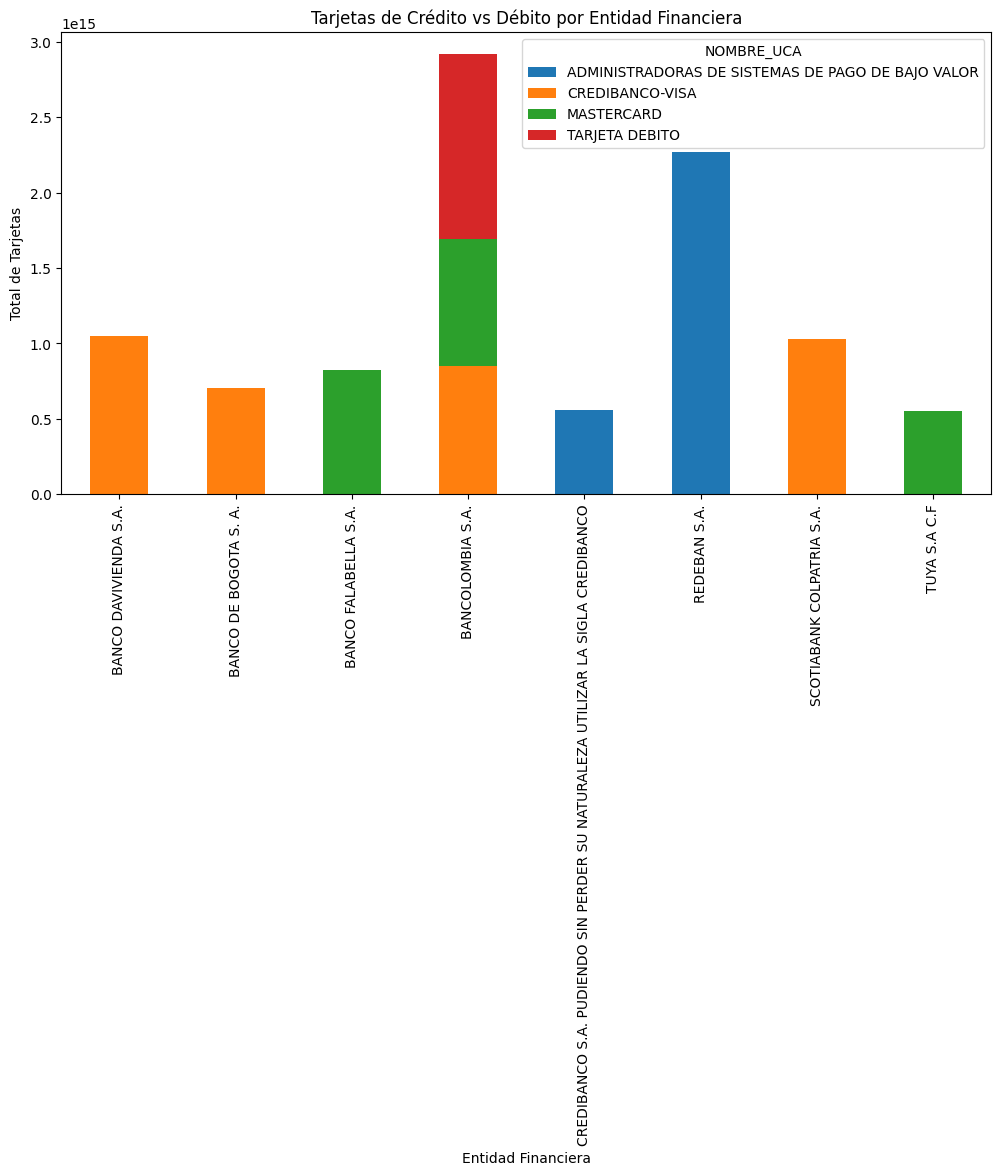

In [77]:
# 1) Hacer la agrupación y obtener la Serie de los 10 grupos más grandes
grupo = df.groupby(['NOMBREENTIDAD', 'NOMBRE_UCA'])['TOTAL_TARJETAS'].sum().nlargest(10)

# 2) Convertir la Serie en DataFrame con reset_index()
grupo = grupo.reset_index()

# 3) Ahora sí usar pivot_table
tabla_pivote = grupo.pivot_table(
    values='TOTAL_TARJETAS',
    index='NOMBREENTIDAD',
    columns='NOMBRE_UCA',
    aggfunc='sum', 
    fill_value=0
)

# 4) Gráfico de barras apiladas
tabla_pivote.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Tarjetas de Crédito vs Débito por Entidad Financiera')
plt.xlabel('Entidad Financiera')
plt.ylabel('Total de Tarjetas')
plt.show()